In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel,f,levene
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest,ttest_ind

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

     样本差均值    t统计量  自由度      p值
Num    1.3  3.0736    9  0.0133


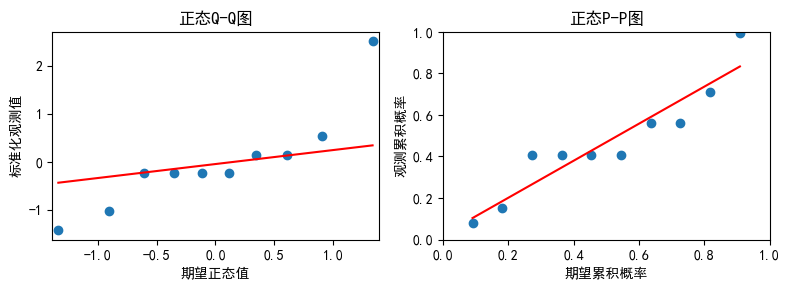

In [3]:
# 配对样本
apple = pd.read_csv('apple.csv')
applebar = (apple['Y1']-apple['Y2']).mean()
t,p_value = np.round(ttest_rel(a=apple['Y1'],b=apple['Y2']),4)
apple_t ={'样本差均值':applebar,'t统计量':t,'自由度':len(apple)-1,'p值':p_value}
print(pd.DataFrame(apple_t,index=['Num']))

pplot = sm.ProbPlot(apple['Y1']-apple['Y2'],fit=True)
plt.subplots(1,2,figsize=(8,3))
# QQ图
ax1 = plt.subplot(121)
pplot.qqplot(line='q',ax=ax1,xlabel='期望正态值',ylabel='标准化观测值')
ax1.set_title('正态Q-Q图',fontsize=12)
# PP图
ax2 = plt.subplot(122)
pplot.ppplot(line='r',ax=ax2,xlabel='期望累积概率',ylabel='观测累积概率')
ax2.set_title('正态P-P图',fontsize=12)
plt.tight_layout()
plt.show()

     自由度    z统计量      p值
Num   70  1.1188  0.2632


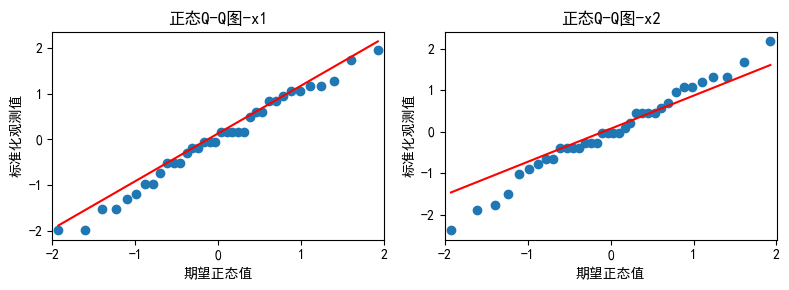

In [5]:
# 成组样本
# 大样本总体已知-z 
# 小/大样本，方差已知-z
example7_5 = pd.read_csv('online.csv')
x1 = example7_5['男生上网时间']
x2 = example7_5['女生上网时间']

z,p_value = np.round(ztest(x1=x1,x2=x2,alternative='two-sided'),4)
vc_t ={'自由度':len(x1)+len(x2)-2,'z统计量':z,'p值':p_value}
print(pd.DataFrame(vc_t,index=['Num']))

pplot1 = sm.ProbPlot(x1,fit=True)
pplot2 = sm.ProbPlot(x2,fit=True)
plt.subplots(1,2,figsize=(8,3))
# X1-QQ图
ax1 = plt.subplot(121)
pplot1.qqplot(line='q',ax=ax1,xlabel='期望正态值',ylabel='标准化观测值')
ax1.set_title('正态Q-Q图-x1',fontsize=12)
# X2-QQ图
ax2 = plt.subplot(122)
pplot2.qqplot(line='q',ax=ax2,xlabel='期望正态值',ylabel='标准化观测值')
ax2.set_title('正态Q-Q图-x2',fontsize=12)
plt.tight_layout()
plt.show()

     自由度      F统计量        p值
Num    9  0.691489  0.295716
Levene检验p值: 0.8369
      自由度    t统计量      p值
Num  18.0  2.3792  0.0286
         自由度    t统计量     p值
Num  17.4205  2.3792  0.029


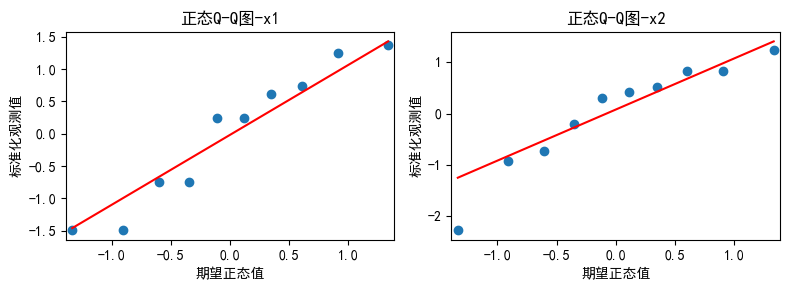

In [7]:
# 小样本总体未知-t
chestnut = pd.read_csv('chestnut.csv')
x1 = chestnut['甲']
x2 = chestnut['乙']
xbar1 = chestnut['甲'].mean()
xbar2 = chestnut['乙'].mean()
# 判断方差是否相等-f
# 关注正态分布敏感
s1_square = x1.var();dfn = len(x1)-1
s2_square = x2.var();dfd = len(x2)-1
f_value = s1_square/s2_square # F值大于1，则计算的p值为(1-函数值)*2
p_value = f.cdf(f_value,dfn=dfn,dfd=dfd)
vc_t ={'自由度':len(x1)-1,'F统计量':f_value,'p值':p_value}
print(pd.DataFrame(vc_t,index=['Num']))
# 关注正态分布不敏感
stat, p = levene(x1, x2)
print(f"Levene检验p值: {p:.4f}")
# 无论如何p值大于0.05，接受原假设，即方差齐性
# 方差未知但相等-t
t,p_value,df = np.round(ttest_ind(x1=x1,x2=x2,alternative='two-sided',usevar='pooled'),4)
vc_t ={'自由度':df,'t统计量':t,'p值':p_value}
print(pd.DataFrame(vc_t,index=['Num']))
# 方差未知但不相等-t
t,p_value,df = np.round(ttest_ind(x1=x1,x2=x2,alternative='two-sided',usevar='unequal'),4)
vc_t ={'自由度':df,'t统计量':t,'p值':p_value}
print(pd.DataFrame(vc_t,index=['Num']))

pplot1 = sm.ProbPlot(x1,fit=True)
pplot2 = sm.ProbPlot(x2,fit=True)
plt.subplots(1,2,figsize=(8,3))
# X1-QQ图
ax1 = plt.subplot(121)
pplot1.qqplot(line='q',ax=ax1,xlabel='期望正态值',ylabel='标准化观测值')
ax1.set_title('正态Q-Q图-x1',fontsize=12)
# X2-QQ图
ax2 = plt.subplot(122)
pplot2.qqplot(line='q',ax=ax2,xlabel='期望正态值',ylabel='标准化观测值')
ax2.set_title('正态Q-Q图-x2',fontsize=12)
plt.tight_layout()
plt.show()